In [1]:
#lets Practice KNN

In [39]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
digits = datasets.load_digits()
# print(digits.DESCR)

In [4]:
x = digits.data
y = digits.target

In [6]:
df = pd.DataFrame(data = y , columns = ['targets'])

In [40]:
# df

In [9]:
x.shape

(1797, 64)

In [10]:
y.shape

(1797,)

In [11]:
digits.images.shape

(1797, 8, 8)

In [12]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

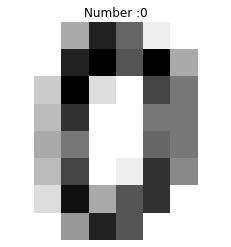

In [17]:
plt.imshow(digits.images[0],cmap=plt.cm.gray_r)
plt.axis('off')
plt.title('Number :' + str(y[0]))
None

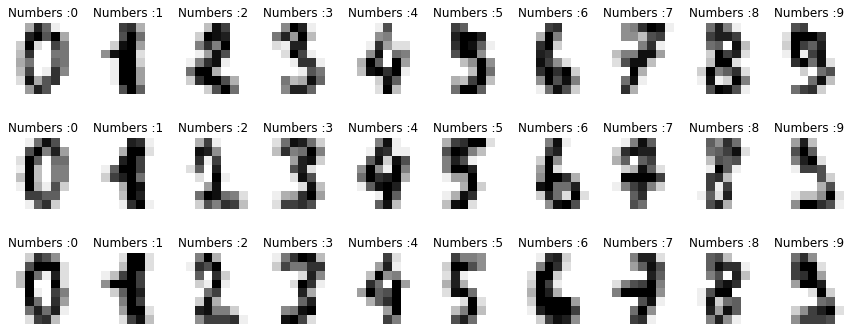

In [20]:
figure,axes = plt.subplots(3,10,figsize = (15,6))

for ax,image,number in zip(axes.ravel(),digits.images , y):
    ax.axis('off')
    ax.imshow(image,cmap=plt.cm.gray_r)
    ax.set_title('Numbers :'+ str(number))

In [22]:
image = digits.images[0]
print('original image data :')
print(image)
print()

image_flattened = image.ravel()
print('flattened image :')
print(image_flattened)
print()

print('feature data for a sample :')
print(x[0])
print()

print(x)

original image data :
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]

flattened image :
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]

feature data for a sample :
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.33 , random_state=99,stratify=y)


In [34]:
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(594,)

In [35]:

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [36]:
y_pred = knn.predict(X_test)
y_pred

array([0, 9, 4, 7, 0, 6, 5, 8, 3, 5, 1, 1, 6, 6, 1, 9, 1, 3, 8, 0, 0, 1,
       4, 3, 7, 5, 1, 5, 2, 3, 5, 0, 5, 2, 2, 3, 0, 6, 9, 3, 4, 9, 7, 4,
       5, 8, 7, 2, 5, 1, 6, 7, 7, 8, 4, 5, 1, 0, 3, 7, 6, 7, 0, 7, 3, 6,
       7, 2, 6, 1, 5, 0, 3, 9, 3, 1, 0, 4, 3, 0, 2, 7, 3, 7, 7, 9, 1, 4,
       7, 4, 1, 5, 1, 0, 4, 0, 8, 7, 6, 7, 9, 9, 4, 4, 8, 9, 0, 8, 3, 8,
       5, 5, 2, 2, 4, 0, 8, 3, 2, 2, 9, 5, 3, 6, 9, 2, 9, 0, 0, 0, 0, 5,
       4, 2, 8, 6, 9, 4, 4, 6, 7, 3, 8, 0, 6, 7, 2, 1, 8, 0, 7, 3, 1, 7,
       4, 3, 4, 2, 1, 5, 3, 3, 6, 9, 2, 2, 0, 6, 7, 8, 1, 7, 3, 8, 2, 5,
       4, 9, 2, 0, 5, 0, 9, 1, 1, 2, 8, 7, 7, 6, 5, 5, 7, 6, 0, 5, 7, 1,
       4, 5, 9, 0, 5, 1, 9, 9, 5, 6, 6, 7, 4, 9, 5, 4, 8, 8, 1, 3, 3, 1,
       2, 2, 9, 1, 9, 6, 4, 3, 8, 5, 0, 9, 2, 8, 4, 6, 0, 2, 7, 2, 3, 6,
       1, 8, 9, 5, 6, 0, 8, 5, 8, 6, 5, 0, 3, 1, 7, 0, 7, 2, 8, 5, 1, 5,
       6, 9, 3, 0, 0, 3, 9, 4, 5, 0, 6, 1, 3, 3, 7, 4, 1, 4, 0, 7, 1, 7,
       2, 6, 5, 9, 0, 0, 9, 6, 6, 0, 5, 4, 0, 1, 4,

In [38]:
from sklearn.metrics import classification_report
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       0.95      0.98      0.97        60
           2       1.00      0.98      0.99        59
           3       1.00      0.98      0.99        60
           4       1.00      1.00      1.00        60
           5       0.97      0.98      0.98        60
           6       1.00      1.00      1.00        60
           7       0.97      1.00      0.98        59
           8       1.00      0.95      0.97        58
           9       0.98      0.98      0.98        59

    accuracy                           0.99       594
   macro avg       0.99      0.99      0.99       594
weighted avg       0.99      0.99      0.99       594



Best Parameters:  {'n_neighbors': 3}


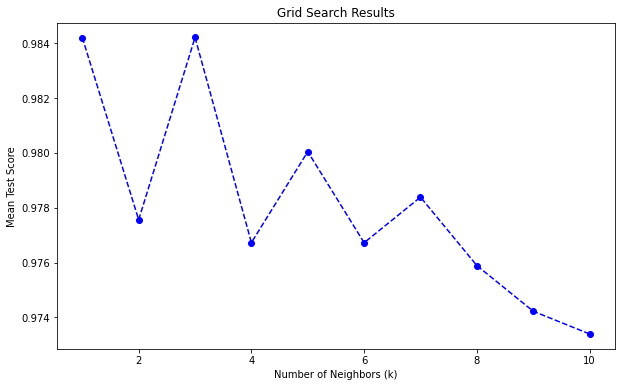

In [41]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': range(1, 11)}


knn = KNeighborsClassifier()


grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)


print("Best Parameters: ", grid_search.best_params_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), grid_search.cv_results_['mean_test_score'], marker='o', linestyle='--', color='b')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Test Score')
plt.title('Grid Search Results')
plt.show()


In [42]:
# Import the cross_val_score function
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation on the whole data
scores = cross_val_score(knn, x, y, cv=5)

# Print the scores and the mean score
print('Cross-validation scores:', scores)
print('Mean cross-validation score:', scores.mean())



Cross-validation scores: [0.94722222 0.95555556 0.96657382 0.98050139 0.9637883 ]
Mean cross-validation score: 0.9627282575054161


In [43]:
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15]}

grid = GridSearchCV(knn, param_grid, cv=5)
grid.fit(X_train, y_train)

print('Best hyperparameter value:', grid.best_params_)
print('Best score:', grid.best_score_)

Best hyperparameter value: {'n_neighbors': 3}
Best score: 0.9842116182572613


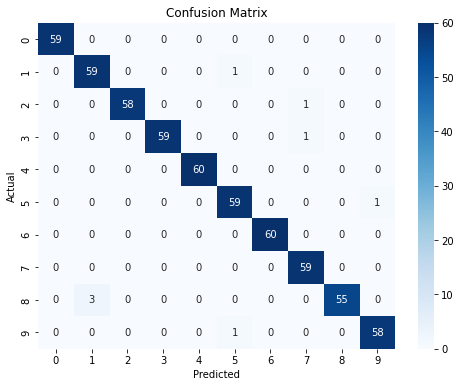

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")



Accuracy: 0.99
Precision: 0.99
Recall: 0.99
F1 Score: 0.99
